In [1]:
import numpy as np
import scipy.linalg as la

import matplotlib.pyplot as plt

from scipy.spatial import KDTree

from rbffd import *

In [2]:
N = 50
# Set up the nodes and epsilon
D = np.linspace(0, 1, N).reshape(-1, 1)  # 1D nodes in the interval [0, 1]

epsilon = 500.0

A = setup_rbf_matrix(D, epsilon, rbf=gaussian_rbf)

plt.matshow(A)

NameError: name 'setup_rbf_matrix' is not defined

In [12]:
# Set up the nodes and epsilon
N = 40  # Number of nodes
X = (np.logspace(0, 1, N).reshape(-1, 1)  -1) /10 # 1D nodes in the interval [0, 1]

epsilon = 3.0

tree = KDTree(X)

# Set up the differential operator (Laplacian in this case)
L = laplacian_operator(X, epsilon, rbf=phs_rbf, tree=tree, stencil_size=9, pdeg=1)

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors_non = la.eig(L)

index = np.argsort(eigenvalues)

eigenvalues = eigenvalues[index]
eigenvectors_non = eigenvectors_non[:,index]

eigenvalues, eigenvectors_non

(array([-2.03114967e+05+0.j, -1.42054355e+05+0.j, -1.07155000e+05+0.j,
        -8.39783904e+04+0.j, -6.73606874e+04+0.j, -5.48188508e+04+0.j,
        -4.51466249e+04+0.j, -3.75536960e+04+0.j, -3.14808063e+04+0.j,
        -2.65504783e+04+0.j, -2.25072586e+04+0.j, -1.91675387e+04+0.j,
        -1.63913026e+04+0.j, -1.40688539e+04+0.j, -1.21142742e+04+0.j,
        -1.04601707e+04+0.j, -9.05369614e+03+0.j, -7.85302294e+03+0.j,
        -6.82455915e+03+0.j, -5.94080961e+03+0.j, -5.17811125e+03+0.j,
        -4.51355430e+03+0.j, -3.92335617e+03+0.j, -3.38758757e+03+0.j,
        -2.89616506e+03+0.j, -2.44698650e+03+0.j, -2.04061070e+03+0.j,
        -1.67738492e+03+0.j, -1.35666008e+03+0.j, -1.07672260e+03+0.j,
        -8.35164832e+02+0.j, -6.29333021e+02+0.j, -4.56539365e+02+0.j,
        -3.14150238e+02+0.j, -1.99860105e+02+0.j, -1.12033217e+02+0.j,
        -4.97154917e+01+0.j, -1.24253679e+01+0.j, -5.90384077e-05+0.j,
        -6.68682333e-10+0.j]),
 array([[-6.39382166e-03, -5.93692467e-03,  5.

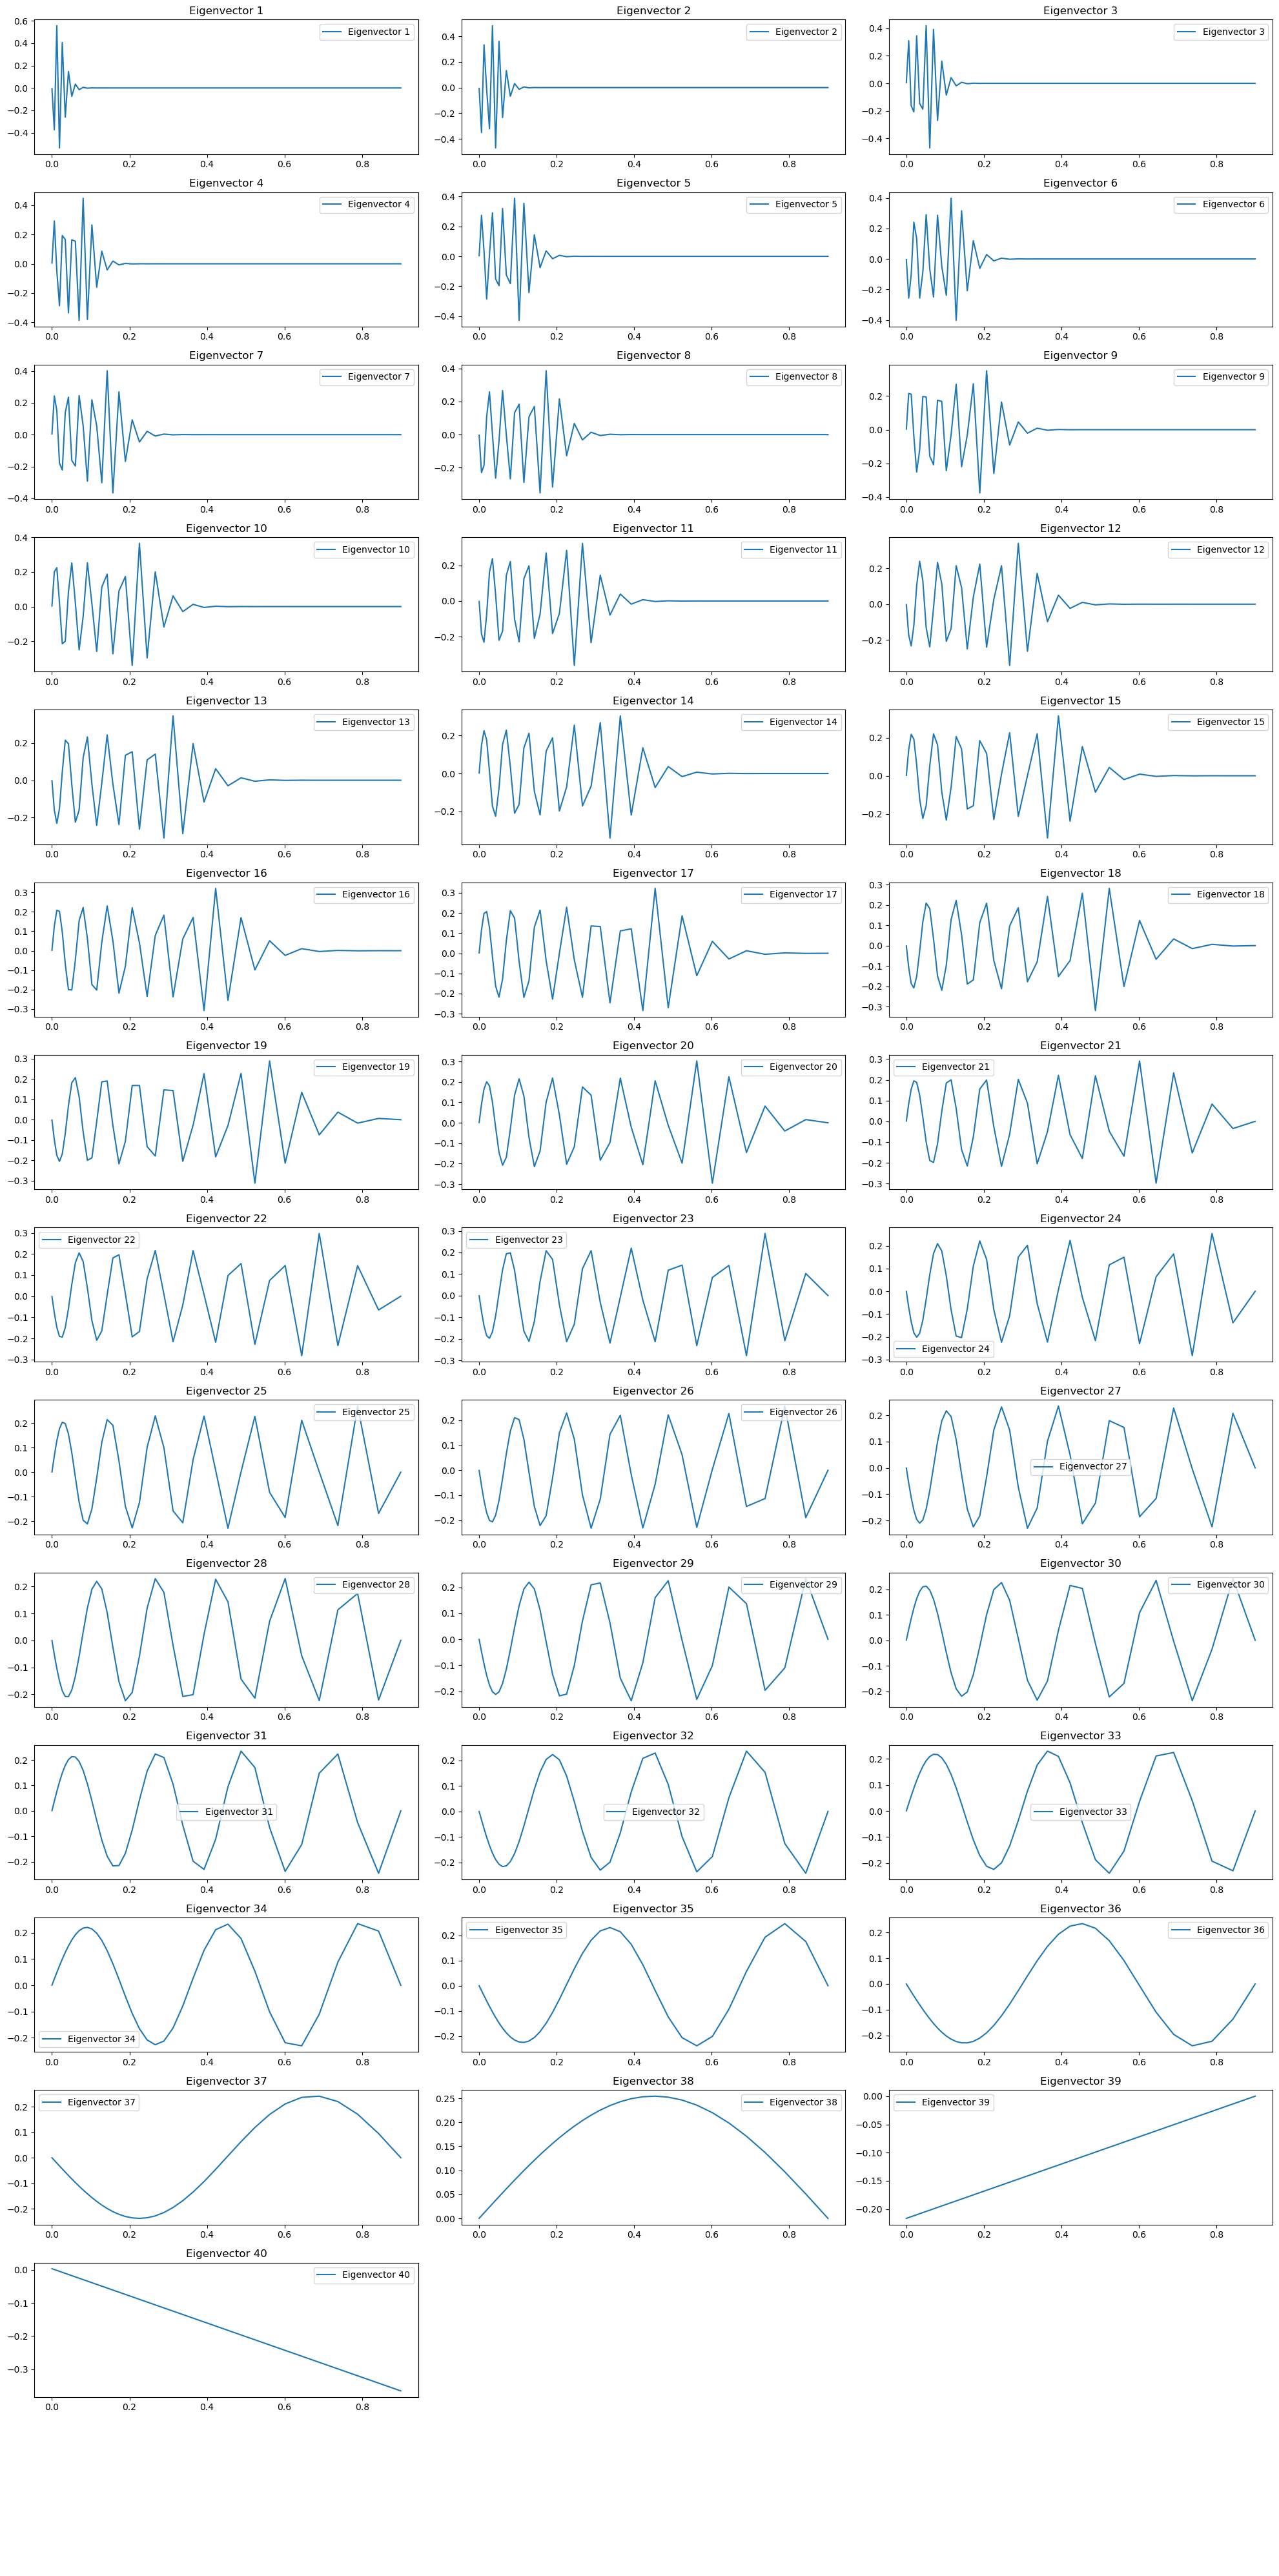

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(15, 3, figsize=(20, 40))

for i, ax in enumerate(axs.flatten()):

    if i > N-1:
        ax.axis("off")
        continue

    ax.plot(X, eigenvectors_non[:, i], label=f"Eigenvector {i+1}")
    ax.set_title(f"Eigenvector {i+1}")
    ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Set up the nodes and epsilon
Y = np.linspace(0, 1, N).reshape(-1, 1)  # 1D nodes in the interval [0, 1]

epsilon = 1000.0

# Set up the differential operator (Laplacian in this case)
L = laplacian_operator(Y, epsilon, rbf=gaussian_rbf)

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors_uniform = la.eig(L)

eigenvalues, eigenvectors_uniform

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(10, 3, figsize=(15, 40))

for i, ax in enumerate(axs.flatten()):

    if i > N-1:
        ax.axis("off")
        continue

    ax.plot(Y, eigenvectors_uniform[:, i], label=f"Eigenvector {i+1}")
    ax.set_title(f"Eigenvector {i+1}")
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(25, 50))

eigenbasis_2d = np.kron(eigenvectors_uniform, eigenvectors_non).reshape(N, N, N**2)

X_mesh, Y_mesh = np.meshgrid(X, Y)

for i, ax in enumerate(axs.flatten()):

    if i > N**2-1:
        ax.axis("off")
        continue

    # Plot the function values as colors in 2D
    #ax.imshow(eigenbasis_2d[:,:,i], cmap='hot', interpolation='nearest')
    ax.pcolormesh(X_mesh, Y_mesh, eigenbasis_2d[:,:,i], cmap='bone')
    ax.set_title(f"Eigenbasis {i+1}")

plt.tight_layout()
plt.show()





